Smoothing Techniques in N-gram Models


***Step 1 - Initial Analysis***

Smoothing:

Smoothing is a crucial process in building n-gram language models as it addresses the issue of data sparsity. In real-world scenarios, models often come across n-grams during testing that were not part of the training data. When this occurs, the model assigns a probability of zero to these unseen n-grams, which disrupts the prediction process and reduces the model's reliability. This challenge is particularly significant in applications like autocomplete and predictive text, where zero probabilities prevent the system from offering meaningful suggestions. Smoothing resolves this problem by assigning a small probability to all n-grams, including those not observed in training, allowing the model to perform consistently even with limited data.

Two widely used smoothing techniques:

Laplace Smoothing: This is a straightforward method which adds a small constant, usually 1, to the count of every possible n-gram. This ensures that no n-gram has a probability of zero, making the model more robust when encountering new word combinations. However, a limitation of this method is that it may overestimate the probabilities of rare n-grams, which could impact overall accuracy.

Kneser-Ney Smoothing: This more advanced method emphasizes the diversity of contexts in which words appear, rather than relying solely on their frequency counts. It redistributes probabilities intelligently by considering lower-order n-grams, ensuring that rare combinations receive more realistic probabilities. Kneser-Ney smoothing is often considered highly effective for improving prediction accuracy, especially when training data is limited or when dealing with complex linguistic patterns.

By applying these smoothing techniques, language models can effectively manage rare or unseen n-grams, leading to better generalization and more accurate predictions. For example, in an autocomplete application, smoothing enables the system to suggest appropriate words or phrases even when the input includes unfamiliar combinations. This greatly enhances the model’s usability and ensures its reliability in real-world tasks.

***Step 2: Data Preparation***

Import necessary packages

In [1]:
# General Libraries
import pandas as pd
import numpy as np
import math
import string
from collections import Counter
import re

# NLP Libraries
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Visualization
import matplotlib.pyplot as plt

Print the first few lines of the dataset and prepare testset

In [2]:
# Path to the Excel file
file_path = r"E:\Aish's Office\Mtech\assignments\NLP\Assignment 1 Dataset.xlsx"

# Load the Excel file into a Pandas DataFrame
dataset = pd.read_excel(file_path, engine='openpyxl')  # Use the openpyxl engine for .xlsx files

# Display the first few rows of the dataset
print(dataset.head(5))

   ID                             Title  \
0  10  Canadian Society of Soil Science   
1   1              King Arthur's family   
2   6                 Ralitsa Vassileva   
3   2         Tom Mooney (rugby league)   
4   3                   Topal (surname)   

                                                 URL  \
0  https://en.wikipedia.org/wiki/Canadian_Society...   
1  https://en.wikipedia.org/wiki/King_Arthur's_fa...   
2    https://en.wikipedia.org/wiki/Ralitsa_Vassileva   
3  https://en.wikipedia.org/wiki/Tom_Mooney_(rugb...   
4      https://en.wikipedia.org/wiki/Topal_(surname)   

                                Introduction/Summary  \
0  The Canadian Society of Soil Science (CSSS) is...   
1                                                NaN   
2  Ralitsa B. Vassileva (Bulgarian: Ралица Василе...   
3                                                NaN   
4  Topal is a Turkish word meaning "lame" and may...   

                                                Body  \
0  Canadian

In [3]:
# Remove any rows with missing values to ensure the dataset is clean and ready for processing
dataset = dataset.dropna()

In [4]:
# Define a dictionary containing various textual examples across multiple domains
testset = {
    "Introduction": [
        "Seasonal forests, with 20-50% deciduous tree coverage, adapt to fluctuating climatic conditions marked by intense summer rains and dry seasons.",
        "Medical advancements, such as image analysis software, are transforming the way diseases like cancer and cardiovascular conditions are diagnosed and treated.",
        "Historical narratives about prominent figures in governance, arts, and sciences provide insights into their societal impacts over centuries.",
        "The study of ancient civilizations through archaeological events uncovers layers of human history and cultural evolution.",
        "Mathematical frameworks and computational models form the backbone of technological innovation across diverse fields.",
        "A skilled defender must rely on a combination of tactical planning, physical agility, and seamless coordination with teammates to ensure their team's success on the field, especially in high-pressure tournaments.",
        "Preparing for a championship often requires rigorous training schedules, mental resilience, and the ability to adapt to ever-changing circumstances, all while maintaining peak performance throughout the competition.",
        "Studio albums are a reflection of an artist's journey, combining diverse musical influences, innovative production techniques, and thoughtful collaboration to create a lasting impact on audiences worldwide.",
        "International competitions, featuring athletes from dozens of nations, bring together extraordinary talent and determination, creating a platform for showcasing individual skill and fostering unity through sportsmanship and mutual respect.",
        "Politicians play a crucial role in shaping policies, addressing the needs of their communities, and implementing programs that aim to improve the quality of life for citizens while balancing economic and social responsibilities.",
        "Competitive sports events often feature extensive planning, rigorous training schedules, and the ability of participants to adapt to varying challenges, making them a true test of skill and resilience.",
        "Structured scientific studies, such as those evaluating protein functions or wastewater systems, rely on precise methodologies and repeated testing to ensure accurate and actionable outcomes.",
        "Television series often explore diverse themes and narratives, requiring a careful balance of character development, episode progression, and audience engagement to sustain long-term success.",
        "Governance systems in ancient civilizations demonstrate the complexity of managing public affairs, including balancing social reforms and navigating political alliances in ever-changing environments.",
        "Testing procedures for environmental suitability, such as those for water quality or air purification, are critical for maintaining ecological balance and safeguarding public health.",
        "Articles discussing advancements in engineering or environmental sciences often emphasize the importance of adhering to rigorous citation standards to support claims and foster academic integrity.",
        "Entertainment mediums, such as film or television, reflect societal shifts and technological innovations, blending creative storytelling with advancements in visual effects and production quality.",
        "In global competitions, athletes demonstrate the culmination of years of training and discipline, pushing their physical and mental limits to achieve peak performance and represent their countries.",
        "Public education systems continually evolve to integrate technological tools and innovative teaching methods, helping students build critical thinking skills and adapt to an ever-changing world."
        "Deciduous trees in seasonal forests employ adaptations such as sclerophyllous leaves and drought-resistant features, making them resilient to changing water and temperature conditions.",
        "Open-source medical software supports complex analysis for conditions like autism, cardiovascular diseases, and various forms of cancer, broadening its applicability in global healthcare.",
        "Historical accounts of statesmen, artists, and scientists reveal the intricacies of their work and the profound influence they have had on cultural preservation and progress.",
        "Mathematical concepts, such as symplectomorphisms in classical mechanics, provide a robust foundation for understanding and simulating complex physical phenomena.",
        "Governance systems are continually evolving through the contributions of key political figures who navigate intricate economic and social reforms to meet emerging challenges.",
        "Organizations working on environmental issues focus on developing innovative solutions to challenges such as pollution, resource scarcity, and climate change, aiming for sustainable development.",
        "Large-scale public infrastructure projects often require meticulous planning, collaboration among multiple stakeholders, and adherence to strict safety and quality standards to meet the needs of growing populations.",
        "Environmental testing methodologies are designed to assess the suitability of resources such as air, water, and soil, ensuring that human and ecological systems remain safe and sustainable.",
        "Historical accounts of governance and law enforcement often highlight the evolution of administrative roles and responsibilities, reflecting societal priorities and the challenges of maintaining order.",
        "Advances in scientific research rely on detailed documentation and collaboration across disciplines, enabling the development of innovative technologies and solutions to complex problems.",
        "Competitive sports leagues focus on fostering talent and creating engaging experiences for both participants and audiences, emphasizing fair play, strategic thinking, and peak physical performance.",
        "The adaptation of creative works, such as novels or stage plays, into films or television series requires careful reinterpretation of themes and characters to suit different visual and narrative formats.",
        "Studies in protein structures and functions are fundamental to understanding biological systems and developing treatments for diseases, bridging the gap between molecular biology and medical advancements.",
        "Technological innovations in transportation systems have transformed how goods and people move, enhancing efficiency, reducing environmental impact, and improving accessibility across urban and rural areas.",
        "The integration of digital tools in education and workplace environments has revolutionized the way people learn and collaborate, promoting flexibility, accessibility, and personalized experiences.",
        "Sustainable practices in agriculture and resource management focus on reducing waste, conserving ecosystems, and developing methods that balance human needs with environmental health."
        "The structured scientific study revealed intricate details about human ecological interactions.",
        "Mathematical frameworks and computational models support complex analysis in resource management.",
        "Evaluating protein structures has been revolutionized by innovative teaching methods.",
        "Scientific studies often emphasize the importance of air purification in urban and rural settings.",
        "A study evaluating ancient civilizations demonstrated their ability to adapt to varying challenges.",
        "Tree coverage plays a critical role in air purification and addressing resource scarcity.",
        "Efforts in reducing waste and conserving resources highlight environmental suitability.",
        "Climate change aiming for reduced pollution requires thoughtful collaboration and social reform.",
        "Environmental issues focus on balancing flexibility and accessibility in urban development.",
        "Reducing waste while maintaining peak efficiency is essential for fostering talent in conservation efforts.",
        "Innovative teaching methods foster academic excellence by addressing the need for community accessibility.",
        "Digital tools in education aim to improve individual skills and foster academic growth.",
        "Education systems emphasize flexibility and accessibility to enhance individual skill development.",
        "Coordinating teammates through structured schedules improves outcomes in academic and workplace environments.",
        "Seamless coordination among stakeholders fosters actionable outcomes and efficient system development.",
        "Open-source medical software supports addressing needs like autism and cardiovascular disease management.",
        "Policy addressing the need for community health often includes innovative medical software solutions.",
        "Reducing waste in healthcare systems emphasizes the importance of flexibility and accessibility.",
        "The feature of making resilient systems is central to modern medical advancements.",
        "Autism and cardiovascular disease management require talent and determination to create innovative solutions.",
        "Public infrastructure projects meet emerging challenges through extensive planning and thoughtful collaboration.",
        "Balancing urban and rural development represents a strategic shift in governance policies.",
        "Historical narratives about prominent figures reveal intricacies in governance and law enforcement.",
        "Governance and law enforcement reforms focus on fostering talent and promoting social reform.",
        "Transportation systems are revolutionized by addressing needs like resource management and efficiency.",
        "Blending creative storytelling with visual effects production creates engaging experiences for audiences.",
        "Reflecting societal priorities in film and television highlights the evolving contribution of key mediums.",
        "Cultural preservation progresses through thoughtful collaboration and social reform initiatives.",
        "Mediums like film and television reflect societal priorities and inspire social reform.",
        "Rigorous training schedules in arts and athletics emphasize the importance of discipline and determination."
]
}

# Convert the dictionary into a pandas DataFrame for structured processing and analysis
testset = pd.DataFrame(testset)


Data Preprocessing

In [5]:
def data_preprocess(text):
    """
    Tokenizes and preprocesses input text.

    Steps:
    1. Convert to lowercase.
    2. Remove unwanted patterns (e.g., "[edit]", structural markers).
    3. Remove square brackets and punctuation.
    4. Tokenize text.
    5. Keep only alphabetic words.
    6. Return the cleaned text.

    Args:
        text (str): Input text to process.

    Returns:
        str: Preprocessed text.
    """
    # Handle missing or NaN text
    if pd.isna(text) or not isinstance(text, str):
        return " "

    try:
        # Step 1: Convert to lowercase
        text = text.lower()

        # Step 2: Remove unwanted patterns
        text = re.sub(r'\[edit\]', '', text)  # Remove "[edit]"
        text = re.sub(r'\b(contents|references|external links|see also|notes|footnotes)\b', '', text)  # Remove structural markers
        text = re.sub(r'[\[\]]', '', text)  # Remove square brackets

        # Step 3: Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Step 4: Tokenize and keep only alphabetic words
        words = word_tokenize(text)
        words = [word for word in words if word.isalpha()]

        # Step 5: Remove extra spaces and return the result
        return " ".join(words).strip()

    except Exception as e:
        # Handle exceptions gracefully
        print(f"Error processing text: {text}\nError: {e}")
        return " "

# For this implementation, We have selected  the "Introduction" column from the dataset 
# to demonstrate the effectiveness of smoothing techniques in a focused and clear manner.

dataset['PreProcd_Introduction'] = dataset['Introduction/Summary'].apply(data_preprocess)

# List of columns to process the future steps
columns_to_process = ['PreProcd_Introduction']

Vocabulary Creation and Out-of-Vocabulary (OOV) Word Handling - Functions Initialization

In [6]:
# Vocabulary Building and OOV Handling Functions
# This section defines functions for creating a vocabulary from dataset, 
# replacing rare words with an 'UNK' token, and counting OOV words in a dataset.
# Function to build vocabulary from dataset for a column

def build_vocabulary(column_data, threshold):
    all_words = ' '.join(column_data).split()
    word_counts = Counter(all_words)
    vocabulary = {word for word, count in word_counts.items() if count >= threshold}
    vocabulary.add('UNK')  # Add the OOV token
    return vocabulary

def replace_rare_with_unk(text, vocabulary):
    if pd.isna(text):
        return " "
    text = text.strip()  # Remove leading/trailing spaces
    words = text.split()
    processed_words = [word if word in vocabulary else 'UNK' for word in words]
    return " ".join(processed_words)

# Function to replace OOV words in text
def replace_oov(text, vocabulary):
    words = text.split()
    return ' '.join([word if word in vocabulary else 'UNK' for word in words])

# Function to count OOV words in a dataset
def count_oov_words(dataset, column, vocabulary):
    oov_count = 0
    for text in dataset[column]:
        words = text.split()
        oov_words = [word for word in words if word == 'UNK' or word not in vocabulary]
        oov_count += len(oov_words)
    return oov_count

# Function to build unique vocabulary from n-grams
def build_ngram_vocabulary(column_data, threshold):
    all_ngrams = set()
    for ngrams_list in column_data:
        all_ngrams.update(ngrams_list)
    ngram_counts = Counter(all_ngrams)
    return {ngram for ngram, count in ngram_counts.items() if count >= threshold}

# Function to generate n-grams
def generate_ngrams(text, n):
    if pd.isna(text) or text == "EMPTY":
        return []
    words = word_tokenize(text.lower())
    n_grams = list(ngrams(words, n))
    return [" ".join(gram) for gram in n_grams]

Generate n-grams(e.g., bigrams, trigrams)

In [7]:
# Process each column in the dataset specified in columns_to_process
for column in columns_to_process:
    print(f"..................................")
    print(f"Processing {column} in dataset...")  # Log the start of processing for the current column
    
    # Step 1: Build a plain unigram vocabulary
    # This creates a vocabulary of unique words (unigrams) in the column with a frequency threshold of 1
    vocabulary = build_vocabulary(dataset[column], threshold=1)
    print(f"Vocabulary Size for {column} (unigrams): {len(vocabulary)}")  # Log the size of the unigram vocabulary
    
    # Step 2: Generate bigrams and trigrams for the column
    # Use the generate_ngrams function to create bigrams (n=2) and trigrams (n=3) for each text entry in the column
    dataset[f'Bigrams_{column}'] = [generate_ngrams(text, 2) for text in dataset[column]]
    dataset[f'Trigrams_{column}'] = [generate_ngrams(text, 3) for text in dataset[column]]
    
    # Step 3: Build unique n-gram vocabularies for bigrams and trigrams
    # Creates vocabularies of unique bigrams and trigrams with a frequency threshold of 1
    bigram_vocab = build_ngram_vocabulary(dataset[f'Bigrams_{column}'], threshold=1)
    trigram_vocab = build_ngram_vocabulary(dataset[f'Trigrams_{column}'], threshold=1)
    
    # Step 4: Log the sizes of the bigram and trigram vocabularies
    print(f"Unique Bigrams Vocabulary Size for {column} (dataset): {len(bigram_vocab)}")  # Log bigram vocabulary size
    print(f"Unique Trigrams Vocabulary Size for {column} (dataset): {len(trigram_vocab)}")  # Log trigram vocabulary size
    print(f"..................................")

..................................
Processing PreProcd_Introduction in dataset...
Vocabulary Size for PreProcd_Introduction (unigrams): 21398
Unique Bigrams Vocabulary Size for PreProcd_Introduction (dataset): 73205
Unique Trigrams Vocabulary Size for PreProcd_Introduction (dataset): 100439
..................................


In [8]:
# Display processed n-grams for the dataset
print("\nProcessed n-grams for dataset:")
for column in columns_to_process:
    # Print a sample of the generated bigrams for the current column
    print(f"Sample Bigrams_{column}:\n{dataset[f'Bigrams_{column}'].head()}")  
    
    # Print a sample of the generated trigrams for the current column
    print(f"Sample Trigrams_{column}:\n{dataset[f'Trigrams_{column}'].head()}")  


Processed n-grams for dataset:
Sample Bigrams_PreProcd_Introduction:
0    [the canadian, canadian society, society of, o...
2    [ralitsa b, b vassileva, vassileva bulgarian, ...
4    [topal is, is a, a turkish, turkish word, word...
5    [eduardo jumisse, jumisse commonly, commonly k...
7    [legoland sichuan, sichuan is, is an, an upcom...
Name: Bigrams_PreProcd_Introduction, dtype: object
Sample Trigrams_PreProcd_Introduction:
0    [the canadian society, canadian society of, so...
2    [ralitsa b vassileva, b vassileva bulgarian, v...
4    [topal is a, is a turkish, a turkish word, tur...
5    [eduardo jumisse commonly, jumisse commonly kn...
7    [legoland sichuan is, sichuan is an, is an upc...
Name: Trigrams_PreProcd_Introduction, dtype: object


***Step 3: Model & Understanding***

Implementing Laplace Smoothing
Laplace Smoothing adds a small constant - alpha = 1 to all n-gram counts.

In [9]:
# Lists to store the new column names for bigrams and trigrams
Bigrams_columns_to_process_Train = []
Trigrams_columns_to_process_Train = []

for column in columns_to_process:
    # Create bigram and trigram column names
    Bigrams_columns_to_process_Train.append(f'Bigrams_{column}')
    Trigrams_columns_to_process_Train.append(f'Trigrams_{column}')

Laplace Smoothing Function

In [10]:
# Define Laplace smoothing function
def laplace_smoothing(ngram_counts, vocab_size, n, alpha):
    """
    Apply Laplace smoothing to n-gram counts to calculate smoothed probabilities.

    Parameters:
    - ngram_counts (dict): A dictionary with n-grams as keys and their counts as values.
    - vocab_size (int): The size of the vocabulary (unique unigrams).
    - n (int): The size of the n-grams (e.g., 1 for unigram, 2 for bigram).
    - alpha (float): The smoothing parameter; typically set to 1 for standard Laplace smoothing.

    Returns:
    - laplace_probs (dict): A dictionary with n-grams as keys and their smoothed probabilities as values.
    """

    # Initialize an empty dictionary to store smoothed probabilities
    laplace_probs = {}

    # Calculate the total denominator for smoothing
    # Total count includes the original counts and the smoothing term
    total_count = sum(ngram_counts.values()) + alpha * (vocab_size ** n)

    # Log the breakdown of terms for debugging and understanding
    print(f"Total Count: {sum(ngram_counts.values())}, Smoothing Term: {alpha * (vocab_size ** n)}, Denominator: {total_count}")

    # Calculate the smoothed probability for each n-gram
    for ngram, count in ngram_counts.items():
        # Add alpha to the original count (Laplace smoothing numerator)
        numerator = count + alpha

        # Compute the smoothed probability
        prob = numerator / total_count

        # Store the smoothed probability in the dictionary
        laplace_probs[ngram] = prob

    # Return the dictionary of smoothed probabilities
    return laplace_probs


In [11]:
# Apply Laplace smoothing for all relevant columns
smoothed_probs = {}

# Set alpha parameter (smoothing strength)
alphas = [1]

for alpha in alphas:

    print("Small constant alpha is:",alpha)
    print("***********************************")
    # Calculate Laplace-smoothed probabilities for bigrams
    for column in columns_to_process:
        #filtered_unigram_vocabulary = [word for word, count in unigram_counts.items() if count > 2]
        V_vocabulary = build_vocabulary(dataset[column], threshold=150)
        dataset[column] = dataset[column].apply(lambda text: replace_rare_with_unk(text, V_vocabulary))
        bigram_vocabulary = build_ngram_vocabulary(dataset[f'Bigrams_{column}'], threshold=1)
        bigram_counts = Counter([bigram for sublist in dataset[f'Bigrams_{column}'] for bigram in sublist if bigram in bigram_vocabulary])
        print(f"bigram_counts for {column}: {len(bigram_counts)}")
        print(f"bigram_vocabulary size for {column}: {len(bigram_vocabulary)}")
        print(f"V_vocabulary size for {column}: {len(V_vocabulary)}")
        laplace_probs = laplace_smoothing(bigram_counts, len(V_vocabulary), 2, alpha)
        smoothed_probs[f'Bigrams_{column}'] = {"Laplace": laplace_probs}
        bigram_probs = smoothed_probs[f'Bigrams_{column}']["Laplace"]
        print(f"Number of Laplace-smoothed probabilities for Bigrams: {len(bigram_probs)}")
        print("***********************************")
        print("Sample Laplace-smoothed probabilities for Bigrams:")
        for ngram, prob in list(smoothed_probs[f'Bigrams_{column}']["Laplace"].items())[:5]:
            print(f"{ngram}: {prob}")

    # Calculate Laplace-smoothed probabilities for trigrams
    for column in columns_to_process:
        print("***********************************")
        trigram_vocabulary = build_ngram_vocabulary(dataset[f'Trigrams_{column}'], threshold=1)
        trigram_counts = Counter([trigram for sublist in dataset[f'Trigrams_{column}'] for trigram in sublist if trigram in trigram_vocabulary])
        print(f"trigram_counts for {column}: {len(trigram_counts)}")
        print(f"trigram_vocabulary size for {column}: {len(trigram_vocabulary)}")
        print(f"V_vocabulary size for {column}: {len(V_vocabulary)}")
        laplace_probs = laplace_smoothing(trigram_counts, len(V_vocabulary), 3, alpha)
        smoothed_probs[f'Trigrams_{column}'] = {"Laplace": laplace_probs}
        trigram_probs = smoothed_probs[f'Trigrams_{column}']["Laplace"]
        print(f"Number of Laplace-smoothed probabilities for Trigrams: {len(trigram_probs)}")
        print("***********************************")
        print("Sample Laplace-smoothed probabilities for Trigrams:")
        for ngram, prob in list(smoothed_probs[f'Trigrams_{column}']["Laplace"].items())[:5]:
            print(f"{ngram}: {prob}")

Small constant alpha is: 1
***********************************
bigram_counts for PreProcd_Introduction: 73205
bigram_vocabulary size for PreProcd_Introduction: 73205
V_vocabulary size for PreProcd_Introduction: 56
Total Count: 121716, Smoothing Term: 3136, Denominator: 124852
Number of Laplace-smoothed probabilities for Bigrams: 73205
***********************************
Sample Laplace-smoothed probabilities for Bigrams:
the canadian: 0.0001521801813347003
canadian society: 1.6018966456284242e-05
society of: 9.611379873770544e-05
of soil: 2.402844968442636e-05
soil science: 2.402844968442636e-05
***********************************
trigram_counts for PreProcd_Introduction: 100439
trigram_vocabulary size for PreProcd_Introduction: 100439
V_vocabulary size for PreProcd_Introduction: 56
Total Count: 118807, Smoothing Term: 175616, Denominator: 294423
Number of Laplace-smoothed probabilities for Trigrams: 100439
***********************************
Sample Laplace-smoothed probabilities for Tr

Implementing Kneser-Ney Smoothing
Kneser-Ney Smoothing redistributes probabilities based on lower-order n-grams. 

In [12]:
def kneser_ney_smoothing(ngram_counts, lower_order_counts, discount, vocab_size):
    # Total n-gram counts
    total_ngrams = sum(ngram_counts.values())
    
    # Lower-order probabilities (continuation probabilities)
    continuation_probs = {key: lower_order_counts.get(key, 0) / sum(lower_order_counts.values()) for key in lower_order_counts}

    # Smoothed probabilities with backoff
    kn_probs = {}
    for ngram, count in ngram_counts.items():
        prefix = ngram[:-1]  # Get the (n-1)-gram prefix
        continuation_prob = continuation_probs.get(ngram[-1], 1 / vocab_size)  # Backoff to lower-order prob if needed
        
        # Discounted count
        discounted_count = max(count - discount, 0)
        
        # Compute smoothed probability with backoff
        lower_order_prob = continuation_probs.get(prefix[-1], 1 / vocab_size) if prefix else 1 / vocab_size
        kn_probs[ngram] = (
            discounted_count / total_ngrams
            + (discount / total_ngrams) * continuation_prob
            + lower_order_prob * (1 - discounted_count / total_ngrams)  # Backoff contribution
        )

    return kn_probs

Discount value for Kneser-Ney Smoothing = 0.7

In [13]:
discount = 0.7 # Discount value for Kneser-Ney Smoothing

# Calculate smoothed probabilities for bigrams
for column in columns_to_process:
    bigram_counts = Counter([bigram for sublist in dataset[f'Bigrams_{column}'] for bigram in sublist])
    unigram_counts = Counter([unigram for sublist in dataset[column] for unigram in sublist.split()])
    
    kn_probs = kneser_ney_smoothing(bigram_counts, unigram_counts, discount, len(unigram_counts))
    smoothed_probs[f'Bigrams_{column}'].update({"Kneser-Ney": kn_probs})

    # Print sample of smoothed probabilities for bigrams
    print(f"Sample Kneser-Ney smoothed probabilities for bigrams in {column}:")
    for ngram, prob in list(kn_probs.items())[:5]:  # Show the first 5 for brevity
        print(f"{ngram}: {prob}")

# Calculate smoothed probabilities for trigrams
for column in columns_to_process:
    trigram_counts = Counter([trigram for sublist in dataset[f'Trigrams_{column}'] for trigram in sublist])
    bigram_counts = Counter([bigram for sublist in dataset[f'Bigrams_{column}'] for bigram in sublist])
    
    kn_probs = kneser_ney_smoothing(trigram_counts, bigram_counts, discount, len(bigram_counts))
    smoothed_probs[f'Trigrams_{column}'].update({"Kneser-Ney": kn_probs})
    
    # Print sample of smoothed probabilities for trigrams
    print(f"Sample Kneser-Ney smoothed probabilities for trigrams in {column}:")
    for ngram, prob in list(kn_probs.items())[:5]:  # Show the first 5 for brevity
        print(f"{ngram}: {prob}")

Sample Kneser-Ney smoothed probabilities for bigrams in PreProcd_Introduction:
the canadian: 0.03013829372122348
canadian society: 0.017859666295779873
society of: 0.017940357647544865
of soil: 0.01786773543095637
soil science: 0.01786773543095637
Sample Kneser-Ney smoothed probabilities for trigrams in PreProcd_Introduction:
the canadian society: 1.6185418838442195e-05
canadian society of: 1.6185418838442195e-05
society of soil: 1.6185418838442195e-05
of soil science: 2.46023163253823e-05
soil science csss: 1.6185418838442195e-05


Evaluating Performance
You can evaluate the performance of both smoothing techniques using metrics like perplexity.

Perplexity function - Initialization

In [14]:
def calculate_perplexity(test_ngrams, smoothed_probs, n, vocab_size, alpha=1):
    log_perplexity = 0
    N = 0
    # Dynamically compute unseen probability based on vocab size
    unseen_prob = alpha / vocab_size if vocab_size > 0 else 1e-12
    for ngram_list in test_ngrams:
        for ngram in ngram_list:
            # Use smoothed probability or fallback probability for unseen n-grams
            prob = smoothed_probs.get(ngram, unseen_prob)
            log_perplexity += -math.log(prob)
            N += 1
    if N == 0:
        print("Warning: Empty test data for perplexity calculation.")
        return float('inf')
    return math.exp(log_perplexity / N)

Preprocessing and Vocabulary Handling for Test Data with N-gram Generation and OOV Management

Preprocessing Test Data: Applying preprocessing steps to clean and prepare test data for further analysis.
Building and Comparing Vocabularies: Constructing test set vocabularies, handling out-of-vocabulary (OOV) words, and comparing them with training set vocabularies.
N-gram Generation: Creating bigrams and trigrams from the test data.
Handling OOV Words: Replacing rare or unseen words in the test data with an UNK token, counting OOV words, and analyzing the impact on the vocabulary size.
Logging and Debugging: Displaying intermediate results, including processed columns, vocabulary sizes, and n-gram vocabularies, to ensure correctness.

In [15]:
#Preprocess test data
for column in columns_to_process:
    print(column) 
    testset_column = column.replace('PreProcd_', '')
    print(testset_column)
    testset[column] = testset[testset_column].apply(data_preprocess)
    #    Display the processed train and test columns
    print("Processed Columns:")
    print(testset[[f'{column}']][0:3])

# Apply for each column to process
for column in columns_to_process:
    print("*******")
    test_vocabulary = build_vocabulary(testset[column], threshold=1)
    print(f"Vocabulary Size for {column} (Test Set): {len(test_vocabulary)}")

    # Replace OOV words in the test set
    testset[f'{column}_OOV'] = [replace_oov(text, vocabulary) for text in testset[column]]

    # Count OOV words in the test set
    test_oov_count = count_oov_words(testset, f'{column}_OOV', vocabulary)
    print(f"Number of OOV words in the test set for {column}: {test_oov_count}")

    # Print the vocabulary size after adding OOV
    oov_vocabulary_test = build_vocabulary(testset[f'{column}_OOV'], threshold=1)
    print(f"Vocabulary Size for {column} after adding OOV in (Test Set): {len(oov_vocabulary_test)}")

    # Generate bigrams and trigrams
    testset[f'Bigrams_{column}'] = [generate_ngrams(text, 2) for text in testset[column]]
    testset[f'Trigrams_{column}'] = [generate_ngrams(text, 3) for text in testset[column]]
    
    # Build unique n-gram vocabularies
    bigram_vocab = build_ngram_vocabulary(testset[f'Bigrams_{column}'], threshold=1)
    trigram_vocab = build_ngram_vocabulary(testset[f'Trigrams_{column}'], threshold=1)
    
    # Log vocabulary sizes
    print(f"Unique Bigrams Vocabulary Size for {column} in (testset): {len(bigram_vocab)}")
    print(f"Unique Trigrams Vocabulary Size for {column} in (testset): {len(trigram_vocab)}")
    print(f"..................................")
    print(f"..................................")

# Display test set with OOV handling
print("\nTest Set with OOV Handling:")
for column in columns_to_process:
    print(f"Sample from {column}_OOV:\n{testset[f'{column}_OOV'].head()}")

PreProcd_Introduction
Introduction
Processed Columns:
                               PreProcd_Introduction
0  seasonal forests with deciduous tree coverage ...
1  medical advancements such as image analysis so...
2  historical narratives about prominent figures ...
*******
Vocabulary Size for PreProcd_Introduction (Test Set): 486
Number of OOV words in the test set for PreProcd_Introduction: 160
Vocabulary Size for PreProcd_Introduction after adding OOV in (Test Set): 391
Unique Bigrams Vocabulary Size for PreProcd_Introduction in (testset): 948
Unique Trigrams Vocabulary Size for PreProcd_Introduction in (testset): 1018
..................................
..................................

Test Set with OOV Handling:
Sample from PreProcd_Introduction_OOV:
0    seasonal forests with deciduous tree UNK adapt...
1    medical advancements such as image analysis so...
2    historical UNK about prominent figures in gove...
3    the study of ancient UNK through archaeologica...
4    mathemat

Evaluation of Smoothing techniques

In [16]:
# Initialize lists to store column names for bigrams and trigrams in the test data
Bigrams_columns_to_process_Test = []
Trigrams_columns_to_process_Test = []

# Generate column names for bigrams and trigrams based on the columns to process
for column in columns_to_process:
    Bigrams_columns_to_process_Test.append(f'Bigrams_{column}')  # Append bigram column name
    Trigrams_columns_to_process_Test.append(f'Trigrams_{column}')  # Append trigram column name

# Unified evaluation loop for calculating perplexity using Laplace and Kneser-Ney smoothing
results = {}  # Dictionary to store results for each column and n-gram type
for ngram_type, columns in [("Bigrams", Bigrams_columns_to_process_Test),  # Process bigrams
                            ("Trigrams", Trigrams_columns_to_process_Test)]:  # Process trigrams
    for column in columns:
        
        train_column = column  # Use the same column name from the training set for probabilities

        # Evaluate perplexity using Laplace smoothing
        laplace_perplexity = calculate_perplexity(
            testset[column],  # Test data for the current n-gram column
            smoothed_probs[train_column].get('Laplace', {}),  # Smoothed probabilities from training
            2 if ngram_type == "Bigrams" else 3,  # Specify n (2 for bigrams, 3 for trigrams)
            len(V_vocabulary)  # Vocabulary size
        )
        
        # Initialize the results dictionary for the current column if not already created
        if column not in results:
            results[column] = {}
        
        # Store Laplace perplexity for the current column
        results[column]["Laplace Perplexity"] = laplace_perplexity

        # Evaluate perplexity using Kneser-Ney smoothing (if available)
        if 'Kneser-Ney' in smoothed_probs[train_column]:
            kneser_ney_perplexity = calculate_perplexity(
                testset[column],  # Test data for the current n-gram column
                smoothed_probs[train_column].get('Kneser-Ney', {}),  # Smoothed probabilities from training
                2 if ngram_type == "Bigrams" else 3,  # Specify n (2 for bigrams, 3 for trigrams)
                len(V_vocabulary)  # Vocabulary size
            )
            # Store Kneser-Ney perplexity for the current column
            results[column]["Kneser-Ney Perplexity"] = kneser_ney_perplexity


Print results

In [17]:
# Loop through the results dictionary to print perplexity values for each column
for column, result in results.items():
    # Print the column name
    print(f"{column}:")
    
    # Print the Laplace perplexity value for the column
    print(f" Laplace Perplexity: {result['Laplace Perplexity']}")
    
    # Check if Kneser-Ney perplexity exists for the column and print it
    if 'Kneser-Ney Perplexity' in result:
        print(f" Kneser-Ney Perplexity: {result['Kneser-Ney Perplexity']}")
        
print("*******************************************")
# Print smoothed probability samples for each column
for column, probs in smoothed_probs.items():
    print(f"\nProbability values for {column}:")  # Print column name for context
    
    # Check if Laplace smoothing probabilities exist and print sample values
    if 'Laplace' in probs:
        print(" Laplace Smoothing:")  # Label for Laplace smoothing
        # Extract and print a sample (from 10th to 15th) of Laplace smoothed probabilities
        laplace_sample_probs = list(probs['Laplace'].items())[:5]
        for ngram, prob in laplace_sample_probs:
            print(f"  {ngram}: {prob}")  # Print n-gram and its smoothed probability
    
    # Check if Kneser-Ney smoothing probabilities exist and print sample values
    if 'Kneser-Ney' in probs:
        print(" Kneser-Ney Smoothing:")  # Label for Kneser-Ney smoothing
        # Extract and print a sample (from 10th to 15th) of Kneser-Ney smoothed probabilities
        kneser_ney_sample_probs = list(probs['Kneser-Ney'].items())[:5]
        for ngram, prob in kneser_ney_sample_probs:
            print(f"  {ngram}: {prob}")  # Print n-gram and its smoothed probability


Bigrams_PreProcd_Introduction:
 Laplace Perplexity: 216.84166262485783
 Kneser-Ney Perplexity: 55.072319281748115
Trigrams_PreProcd_Introduction:
 Laplace Perplexity: 70.8971073828322
 Kneser-Ney Perplexity: 68.98097529518408
*******************************************

Probability values for Bigrams_PreProcd_Introduction:
 Laplace Smoothing:
  the canadian: 0.0001521801813347003
  canadian society: 1.6018966456284242e-05
  society of: 9.611379873770544e-05
  of soil: 2.402844968442636e-05
  soil science: 2.402844968442636e-05
 Kneser-Ney Smoothing:
  the canadian: 0.03013829372122348
  canadian society: 0.017859666295779873
  society of: 0.017940357647544865
  of soil: 0.01786773543095637
  soil science: 0.01786773543095637

Probability values for Trigrams_PreProcd_Introduction:
 Laplace Smoothing:
  the canadian society: 6.792947561841297e-06
  canadian society of: 6.792947561841297e-06
  society of soil: 6.792947561841297e-06
  of soil science: 1.0189421342761945e-05
  soil science 

Visualization Charts of Probabilty and Perplexity values - First 100 values

Probabilities Chart

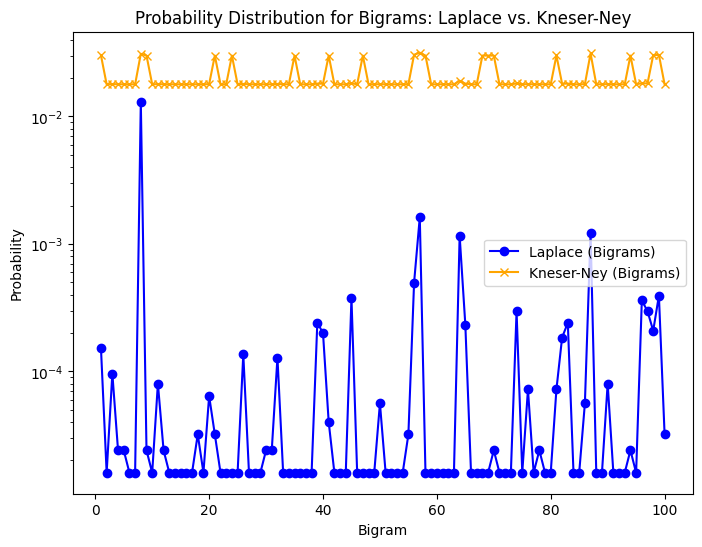

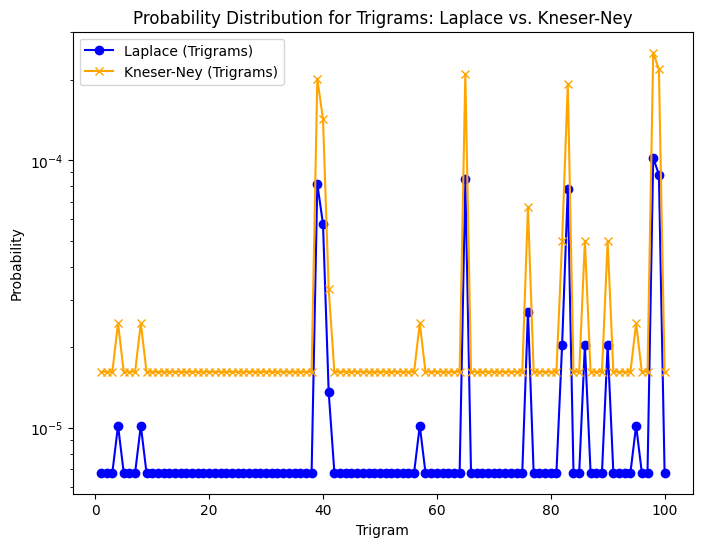

In [18]:
# Extracting the first 100 probabilities for Bigrams and Trigrams for both smoothing techniques
laplace_sample_probs_bigrams = list(smoothed_probs['Bigrams_PreProcd_Introduction']['Laplace'].values())[:100]
kneser_sample_probs_bigrams = list(smoothed_probs['Bigrams_PreProcd_Introduction']['Kneser-Ney'].values())[:100]

laplace_sample_probs_trigrams = list(smoothed_probs['Trigrams_PreProcd_Introduction']['Laplace'].values())[:100]
kneser_sample_probs_trigrams = list(smoothed_probs['Trigrams_PreProcd_Introduction']['Kneser-Ney'].values())[:100]

# Plotting the probabilities for Bigrams with Logarithmic Scale
fig, ax = plt.subplots(figsize=(8, 6))

x_labels_bigrams = np.arange(1, len(laplace_sample_probs_bigrams) + 1)
ax.plot(x_labels_bigrams, laplace_sample_probs_bigrams, label='Laplace (Bigrams)', color='blue', marker='o')
ax.plot(x_labels_bigrams, kneser_sample_probs_bigrams, label='Kneser-Ney (Bigrams)', color='orange', marker='x')

ax.set_xlabel('Bigram')
ax.set_ylabel('Probability')
ax.set_title('Probability Distribution for Bigrams: Laplace vs. Kneser-Ney')
ax.set_yscale('log')  # Setting the y-axis to logarithmic scale for better visualization
ax.legend()

plt.show()

# Plotting the probabilities for Trigrams with Logarithmic Scale
fig, ax = plt.subplots(figsize=(8, 6))

x_labels_trigrams = np.arange(1, len(laplace_sample_probs_trigrams) + 1)
ax.plot(x_labels_trigrams, laplace_sample_probs_trigrams, label='Laplace (Trigrams)', color='blue', marker='o')
ax.plot(x_labels_trigrams, kneser_sample_probs_trigrams, label='Kneser-Ney (Trigrams)', color='orange', marker='x')

ax.set_xlabel('Trigram')
ax.set_ylabel('Probability')
ax.set_title('Probability Distribution for Trigrams: Laplace vs. Kneser-Ney')
ax.set_yscale('log')  # Setting the y-axis to logarithmic scale for better visualization
ax.legend()

plt.show()


Perplexity Chart

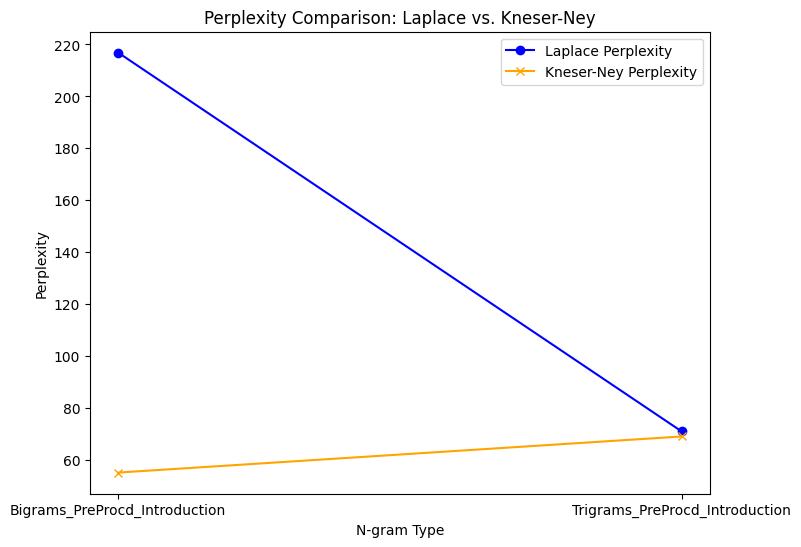

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for plotting
columns = list(results.keys())
laplace_perplexity = [result['Laplace Perplexity'] for result in results.values()]
kneser_perplexity = [result.get('Kneser-Ney Perplexity', None) for result in results.values()]

# Plotting the Perplexity values
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the values
ax.plot(columns, laplace_perplexity, label='Laplace Perplexity', color='blue', marker='o')
ax.plot(columns, kneser_perplexity, label='Kneser-Ney Perplexity', color='orange', marker='x')

# Adding labels and title
ax.set_xlabel('N-gram Type')
ax.set_ylabel('Perplexity')
ax.set_title('Perplexity Comparison: Laplace vs. Kneser-Ney')
ax.legend()

# Show the plot
plt.show()


## Conclusion ##

In this implementation, we analyzed and compared the performance of Laplace Smoothing and Kneser-Ney Smoothing on n-gram language models, focusing on their impact on perplexity values and probability calculations. The results reveal distinct differences in how these smoothing techniques handle data sparsity and unseen n-grams.

**Perplexity Analysis**

In this implementation, we evaluated the performance of Laplace Smoothing and Kneser-Ney Smoothing for bigram and trigram models, focusing on their impact on perplexity values and their ability to handle data sparsity and unseen n-grams.

Laplace Smoothing:

With an alpha value of 1, Laplace smoothing assigned small non-zero probabilities to all n-grams, ensuring that unseen n-grams did not receive zero probability. For bigrams, Laplace smoothing produced a perplexity of 216.84, a relatively high value indicating its struggle to handle data sparsity effectively. The uniform addition of probabilities penalized frequent n-grams, inflating the perplexity.
For trigrams, however, Laplace smoothing achieved a perplexity of 70.89, which is significantly lower than for bigrams. This improvement can be attributed to the increased context provided by trigrams, which reduced the reliance on smoothing by increasing the likelihood of observed n-grams. While the performance of Laplace smoothing improved for trigrams, it remained slightly higher than Kneser-Ney.

Kneser-Ney Smoothing:

Using a discount factor of 0.7, Kneser-Ney smoothing excelled in redistributing probabilities by leveraging lower-order n-grams and introducing context-aware adjustments through discounted counts and continuation factors. This led to significantly reduced perplexity values compared to Laplace smoothing, particularly for bigrams, where the perplexity was 55.07. This lower value reflects Kneser-Ney's strength in handling data sparsity by dynamically adjusting probabilities and efficiently backing off to lower-order models for unseen n-grams.
For trigrams, Kneser-Ney produced a perplexity of 68.98, which is slightly better than Laplace but shows a smaller margin of improvement. The close proximity of perplexity values for Laplace and Kneser-Ney in trigrams suggests that the dataset already contained sufficient context for trigrams, reducing the overall impact of smoothing techniques.

Key Observations:

Bigram Performance:

Laplace Smoothing (216.84): High perplexity due to over-reliance on uniform probability redistribution to handle sparsity.
Kneser-Ney Smoothing (55.07): Demonstrates superior handling of data sparsity with significantly lower perplexity, leveraging advanced smoothing mechanisms.

Trigram Performance:

Laplace Smoothing (70.89): Improved performance compared to bigrams due to reduced sparsity with increased context.
Kneser-Ney Smoothing (68.98): Marginally better perplexity than Laplace, reflecting its robustness while highlighting that trigrams in this dataset require less smoothing overall.

Threshold and Its Importance:
A threshold of 150 was applied to filter rare words from the vocabulary. Words appearing fewer than 150 times were replaced with the UNK token.

Impact of Threshold:
    Filtering rare words reduced data sparsity, allowing the model to focus on frequent n-grams that contribute more to generalization.
    Replacing rare words with UNK ensured that unseen words were handled uniformly, preventing zero probabilities during evaluation.

**Probability Calculations:**

Laplace Smoothing:

Probabilities were calculated by adding 1 (alpha) to each n-gram count and dividing by the adjusted total count. While effective in assigning probabilities to unseen n-grams, this approach uniformly penalized frequent n-grams, leading to higher perplexity.
Example Probability (Bigrams): 1.6e-05 for most rare n-grams, reflecting its uniform smoothing approach.

Kneser-Ney Smoothing:

Probabilities were adjusted using:
Discounted Counts: A fixed discount factor (0.7) reduced the weight of observed n-grams.
Continuation Factor: Assigned higher probabilities to rare n-grams based on their unique contexts.
Backoff: Leveraged lower-order n-grams for unseen combinations, ensuring robust handling of sparsity.
Example Probability (Bigrams): 0.0179, reflecting more context-aware smoothing.

Key Observations:

Laplace Smoothing:
    Provides a simple approach to handling unseen n-grams but struggles with higher perplexity values due to uniform probability redistribution.

Kneser-Ney Smoothing:
    Outperforms Laplace by leveraging *discounted counts*, *backoff*, and *continuation factors* to assign probabilities dynamically, resulting in lower perplexity values and better handling of rare n-grams.

**Kneser-Ney Smoothing** is more effective than Laplace smoothing, as evidenced by its significantly lower perplexity values for bigrams and slightly better performance for trigrams. The use of a threshold and the UNK token further enhanced the model’s ability to handle rare and unseen n-grams, reducing data sparsity. However, Laplace smoothing demonstrated a notable improvement in trigrams, where the availability of additional context reduced the need for smoothing, allowing it to achieve perplexity values comparable to Kneser-Ney. These results emphasize the robustness of Kneser-Ney Smoothing while also highlighting how Laplace Smoothing can benefit from larger contexts in specific scenarios.